# Regression

Measures the <b>dependency</b> of a variable on the predictors, and can be linear, sigmoidal etc.<br>
Regressions can be used to make predictions

<b>Assumptions</br>
1. Independence of Observations
2. Linearity: Linear relationship between predictor and dependent
3. Normality of Residuals (with a mean error of zero)
5. Homoscedasticity: The variance of the residual errors is constant across all values of the independent variables

> A good regression model has small residuals

## Simple Linear Regression

For continuous dependants e.g. QoL, MMSE<br>
Linear regressions estimate the magnitude of the effect of changing the predictor on a dependent

$H_0: \text{No relationship between the predictor and the dependent}$<br>
$H_1: \text{A relationship between the predictor and the dependent}$

Model:<br>
$\text{Dependant Variable}_i = \alpha + \beta\:*\:\text{Predictor or Independent Variable}_i$<br>
where $\alpha$ = y-intercept or the estimated dependant variable value when predictor = 0<br>
$\beta$-coefficient = slope or the amount that the dependent variable increases per 1-unit increase in the predictor

> Reminiscent of $y = mx + c$ where c is the y-intercept and m is the slope

Produces analysis-of-variance table: coefficients (effect of the independent variable on the dependent variable); SEs; t-values (whether each coefficient is statistically different from 0); p-values (statistical significance of results); R-squared (proportion of variance in the dependent variable explained by the independent variables; F-statistic (whether model as a whole is statistically significant

In [1]:
import os
os.chdir("/Applications/Stata/utilities")
from pystata import config
config.init("se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Unlimited-user network, expiring  9 Sep 2025
Serial number: 501809305305
  Licensed to: Mujie
               

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.



. 
. sysuse auto
(1978 automobile data)

. 
. reg price weight

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(1, 72)        =     29.42
       Model |   184233937         1   184233937   Prob > F        =    0.0000
    Residual |   450831459        72  6261548.04   R-squared       =    0.2901
-------------+----------------------------------   Adj R-squared   =    0.2802
       Total |   635065396        73  8699525.97   Root MSE        =    2502.3

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   2.044063   .3768341     5.42   0.000     1.292857    2.795268
       _cons |  -6.707353    1174.43    -0.01   0.995     -2347.89    2334.475
-----------------------------------------------------------------

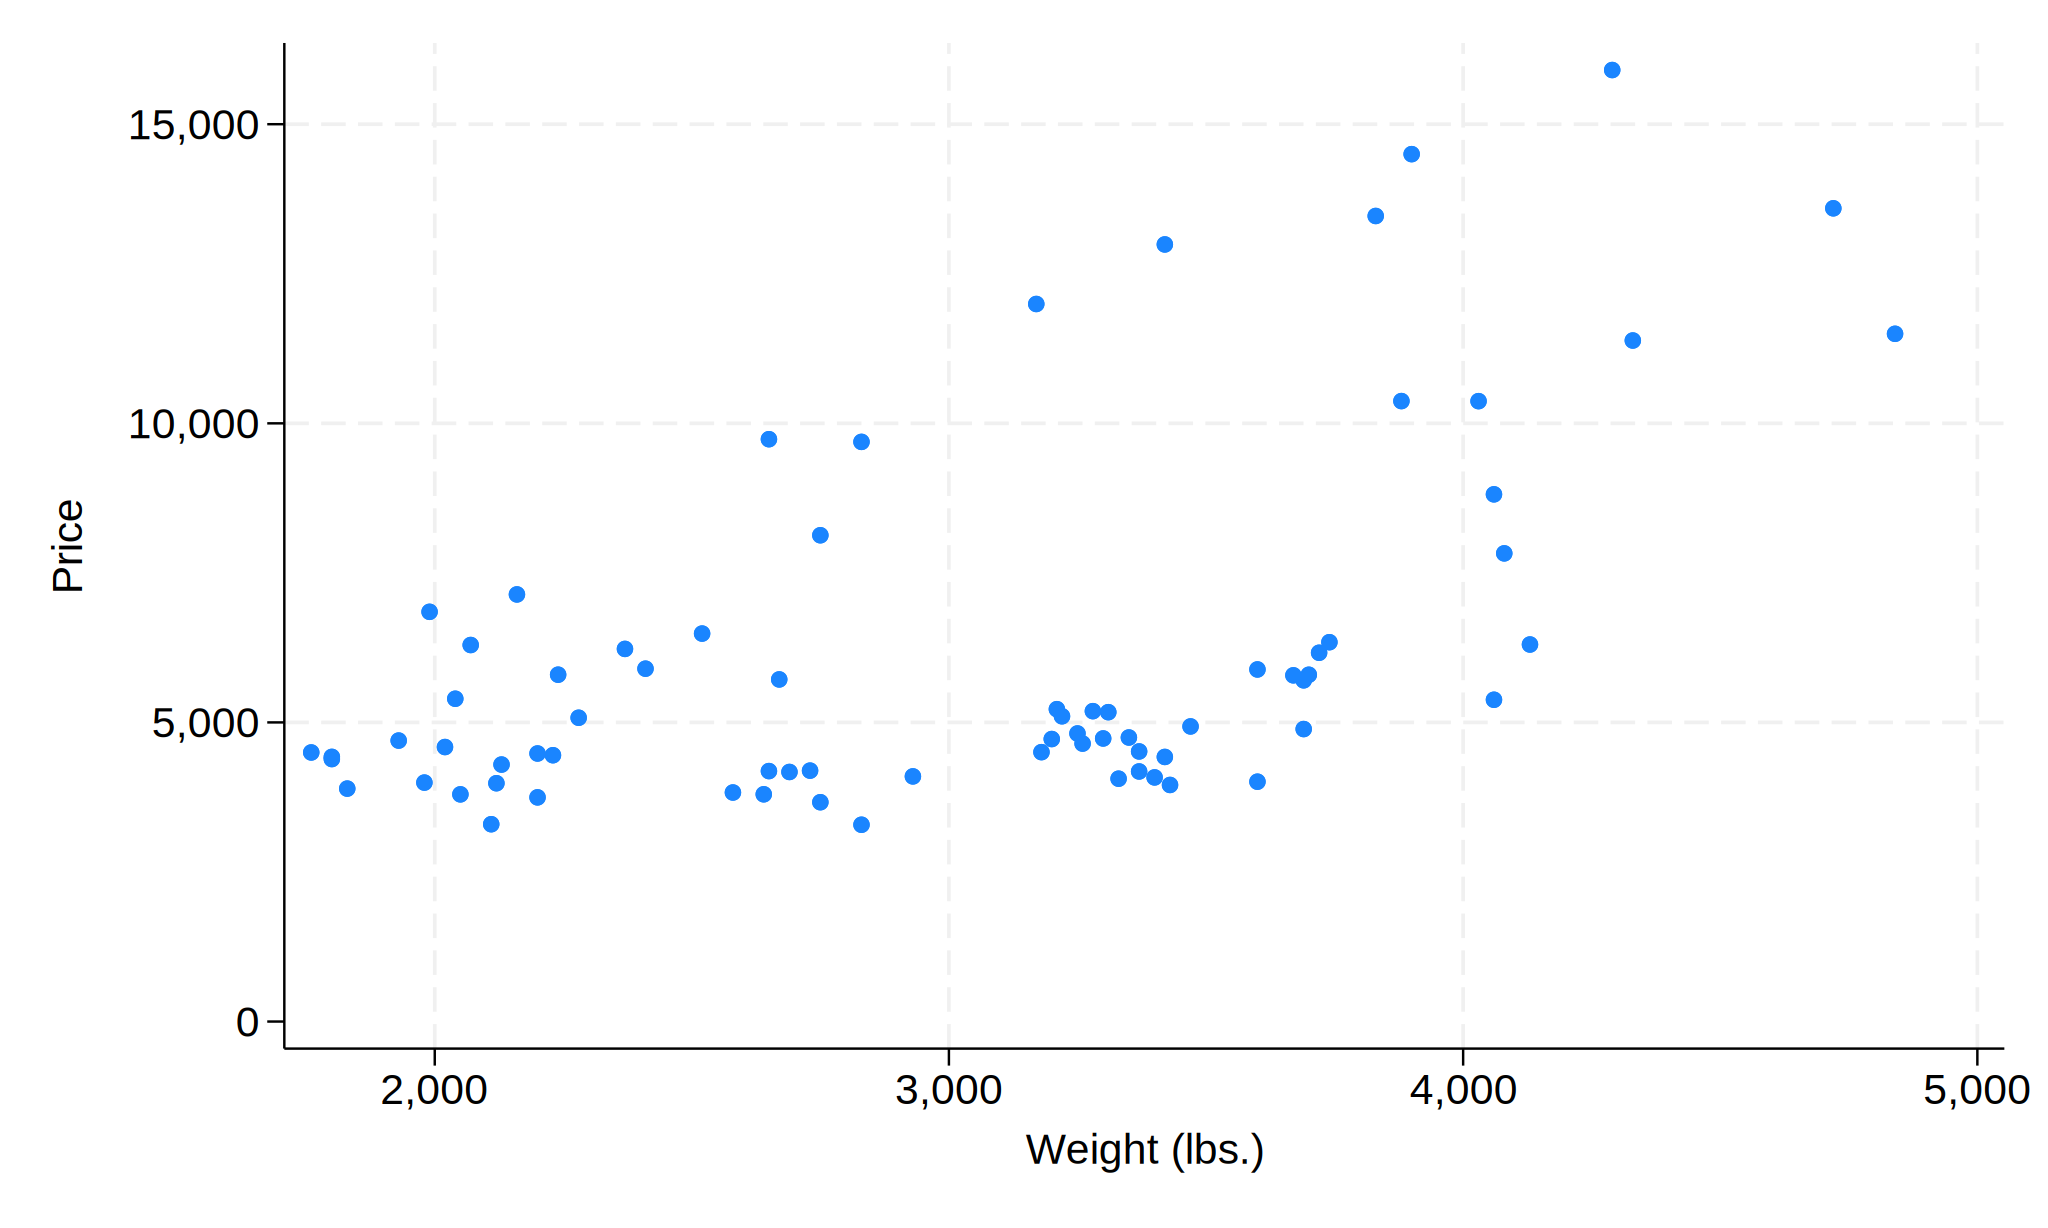

In [2]:
%%stata

sysuse auto

reg price weight
reg price i.foreign // Prefix "i" when a predictor is categorical/binary

scatter price weight

As a convention, the dependent variable is plotted on the y-axis

Key outputs for interpretation:<br>
β-coefficient, y-intercept (_cons), 95% CI and p-value (Prob > F)<br>

Regression of Price with Weight produces a β-Coefficient of 2.04, 95% CI of 1.29 to 2.8, and a p-value of 0.000<br>
The confidence interval indicates that the price may increase by as little as 1.29 dollars per lbs in weight or as much as 2.8 dollars per lbs in weight. The CI does not cross zero, which suggests there is a statistically significant increase in price associated with weight. This is emphasised by the p-value < 0.05 (p-value = 0.000). Therefore, we reject $H_0$ that there is no relationship between the predictor and the outcome in favour of the alternative hypothesis.

> $R^2$ is the coefficient of determination, indicatingn the proportion of the variation in the dependent variable that is predictable from the independent variable

#### Prediction
By using the model:<br>
$Price = -6.707 + 2.04 * Weight$

A car of 6000 lbs can be predicted to cost $12233.30 (2 d.p.)

## Multivariate Linear Regression

For including multiple predictors and control for confounders

<b>Assumptions</br>
1. Independence of Observations
2. Linearity: Linear relationship between predictor and dependent
3. Multicollinearity: Assumes that two or more independent variables are NOT highly correlated with each other<br>(confirm with Correlation Matrix or Variance Inflation Factor)
4. Normality of Residuals (with a mean error of zero)
5. Homoscedasticity: The variance of the residual errors is constant across all values of the independent variables

$H_0: \text{No relationship between the predictors and the dependent}$<br>
$H_1: \text{A relationship between the predictors and the dependent}$

Model:<br>
$\text{Dependent Variable}_i = \alpha + \beta_1 * \text{Independent Variable 1} _i + \beta_2 * \text{Confounding Variable 2} _i + \beta_3 * \text{Confounding Variable 3}_i$ ...

In [3]:
%%stata

reg price weight mpg foreign


. 
. reg price weight mpg foreign

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(3, 70)        =     23.29
       Model |   317252881         3   105750960   Prob > F        =    0.0000
    Residual |   317812515        70  4540178.78   R-squared       =    0.4996
-------------+----------------------------------   Adj R-squared   =    0.4781
       Total |   635065396        73  8699525.97   Root MSE        =    2130.8

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |   3.464706    .630749     5.49   0.000     2.206717    4.722695
         mpg |    21.8536   74.22114     0.29   0.769    -126.1758     169.883
     foreign |    3673.06   683.9783     5.37   0.000     2308.909    5037.212
       _cons | 

Output Table

|Predictors| |Coefficient|95% CI|P-value|
|--|--|--|--|--|
|weight||3.46|2.21, 4.77|0.000|
|mpg||21.85|-126.1758, 169.88|0.769|
|foreign|No|baseline|||
||Yes|-5853.7|-12588.9, 881.49|0.000|

Prob > F tests the statistical significance of the entire model, while P>|t| tests each of the contributors while holding the other predictors constant (thus controlling for the confounding factors). This is not the same as excluding the other confounders from the regression.

The interpretation is that, after controlling for mpg and foreign status of a car, one additional lbs increases the price of the car by 3.46 dollars. The confidence interval indicates that price may increase as much as 2.20 to 4.72 dollars per lbs of weight. This is statistically significant as it does not include 0. After controlling for weight and foreign status of a car, a one-unit increase in mpg increases the price of the car by 21.9 dollars. The confidence interval indicates that the price may decrease by as much as -126.18 dollars or increase by 169.88 dollars per increase in mpg. This includes 0, indicating that the effect of mpg on price is not statistically significant. After controlling for weight and mpg, it was found that a foreign car costs 3673.06 dollars less than that of a domestic car. The 95% CI indicates the range within which the real increase in price when a car is foreign, and since it does not include 0, the increasing effect of the foreign status of the car is statistically significant. We can reject the $H_0$s of no relationship between mpg and car price and no relationship between foreign status and car price in favour of the respective $H_1$.

#### Prediction
By using the model:<br>
$\text{Price} = -5853.7 + 3.46 * \text{Weight} + 21.85 * \text{mpg} + (-58.53 * \text{foreign})$

A foreign car (1) weighing 4500 lbs with a mpg of 70 would cost $11187.27

# Logistic Regression

For categorical (or  binary) dependants e.g. Dementia, PK<br>
In these instances, the regression model estimates the probability of the outcome occurring

<b>Assumptions</br>
1. Independence of Observations
2. Linearity: Linear relationship between predictor and dependent
3. Multicollinearity: Assumes that two or more independent variables are NOT highly correlated with each other<br>(confirm with Correlation Matrix or Variance Inflation Factor)
4. Normality of Residuals (with a mean error of zero)
5. Homoscedasticity: The variance of the residual errors is constant across all values of the independent variables

$H_0: \text{No relationship between the predictor(s) and odds of dependent}$<br>
$H_1: \text{A relationship between the predictor(s) and odds of dependent}$

Model:<br>
$logit(p) = log(\frac{p}{1-p}) = \alpha + \beta_1 * \text{Predictor Variable 1} + \beta_2 * \text{Predictor Variable 2}$
> A logit is a function that assigns a number to a probability


. 
. gen price_strat = .
(74 missing values generated)

. replace price_strat = 0 if price < 10000
(64 real changes made)

. replace price_strat = 1 if price >= 10000
(10 real changes made)

. 
. logit price_strat mpg

Iteration 0:  Log likelihood = -29.306449  
Iteration 1:  Log likelihood = -21.176263  
Iteration 2:  Log likelihood = -16.723151  
Iteration 3:  Log likelihood = -16.617356  
Iteration 4:  Log likelihood = -16.616394  
Iteration 5:  Log likelihood = -16.616394  

Logistic regression                                     Number of obs =     74
                                                        LR chi2(1)    =  25.38
                                                        Prob > chi2   = 0.0000
Log likelihood = -16.616394                             Pseudo R2     = 0.4330

------------------------------------------------------------------------------
 price_strat | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+--------------------------

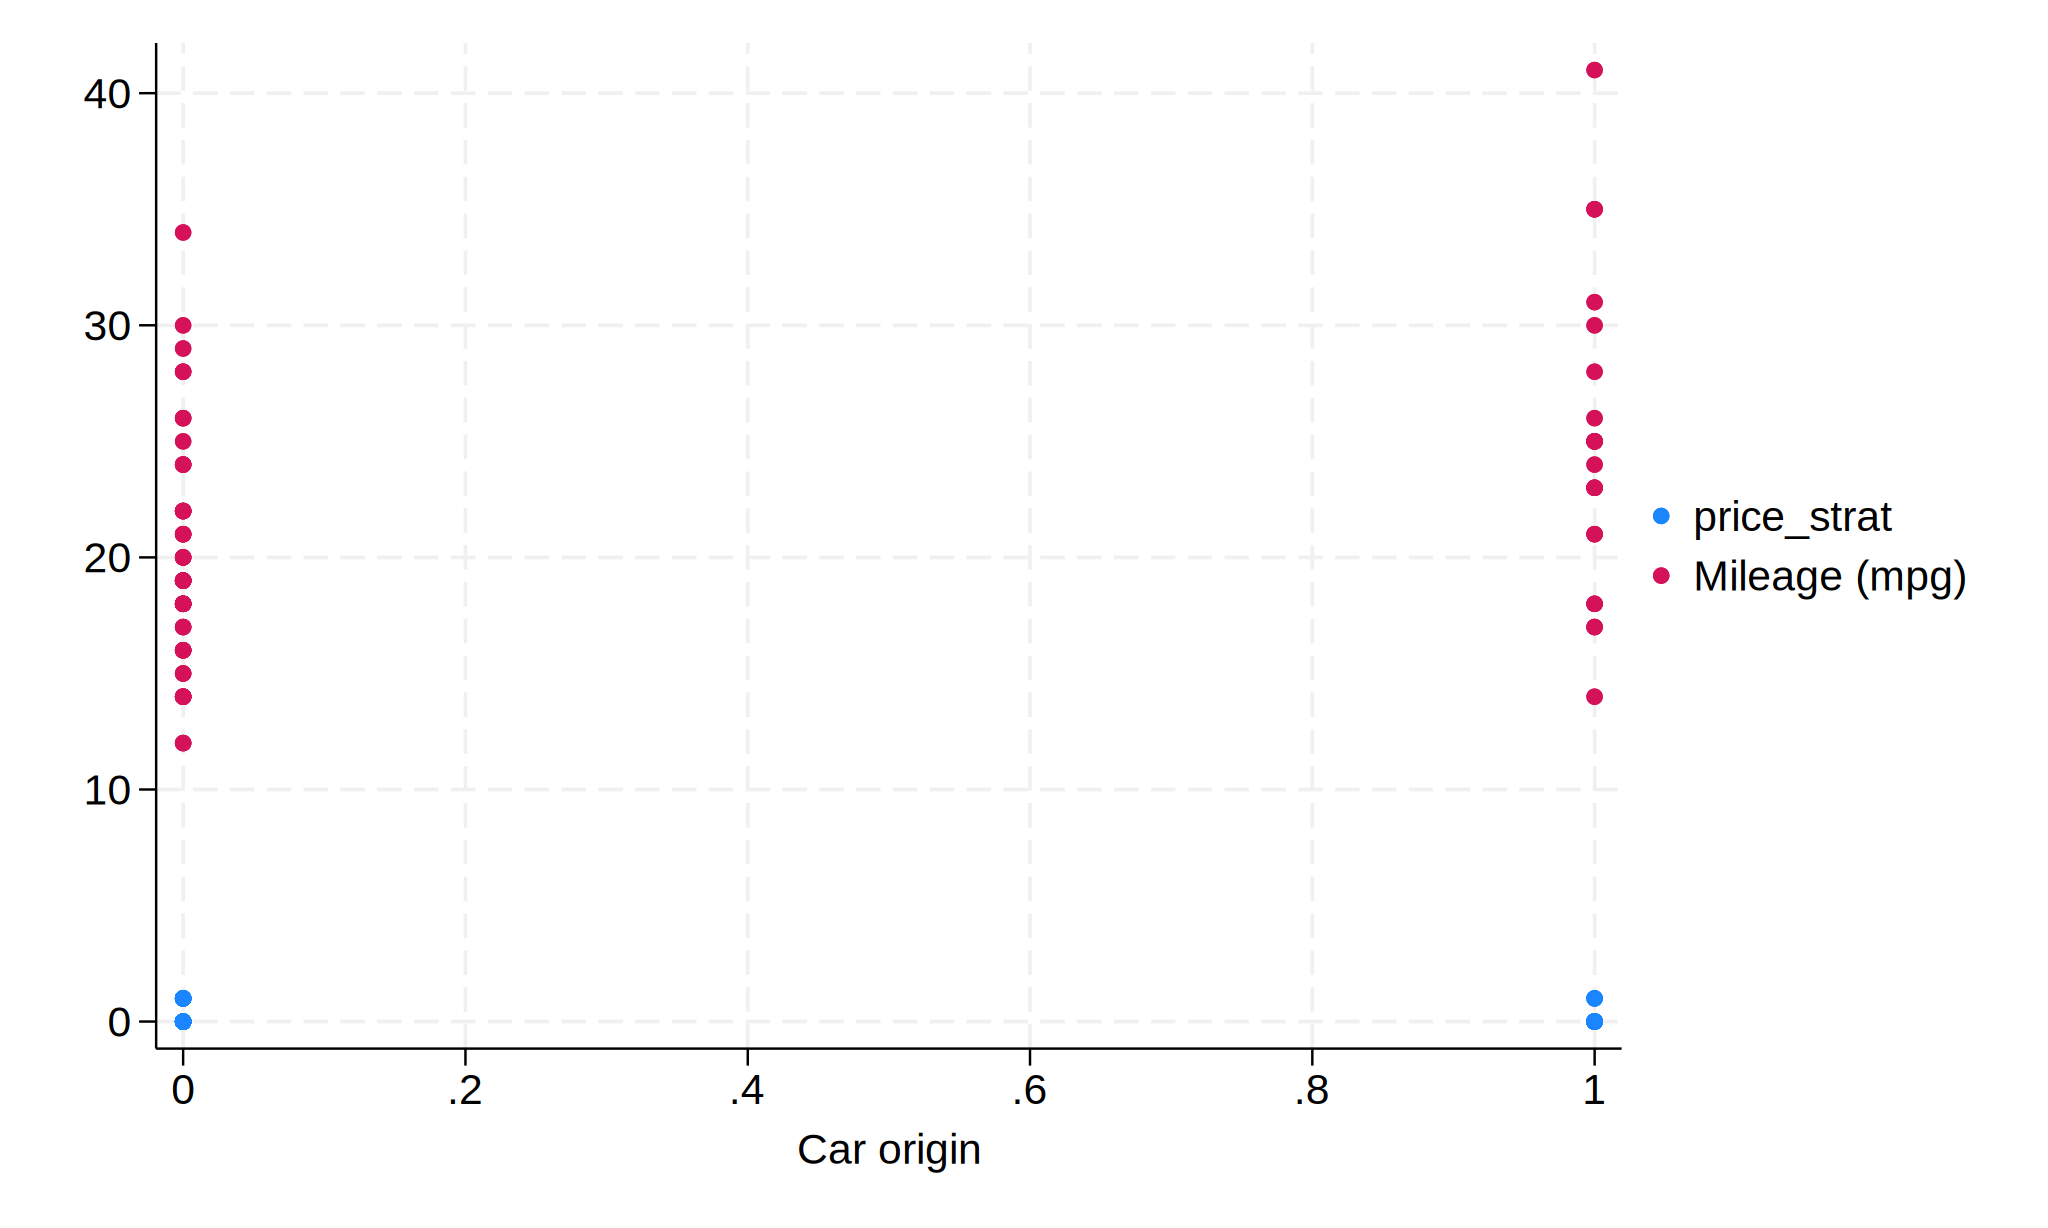

In [4]:
%%stata

gen price_strat = .
replace price_strat = 0 if price < 10000
replace price_strat = 1 if price >= 10000

logit price_strat mpg
logistic price_strat mpg foreign

scatter price_strat mpg foreign

Key outputs for interpretation:
Odds Ratio (or $(\frac{p}{1-p})$), 95% CI and p-value.
> β-coefficients for logistic regression are hard to interpret. The Odds Ratio is more intuitive

OR = 1: Predictor does not affect outcome<br>
OR > 1: Odds of the outcome increases with each unit increase in the predictor<br>
OR < 1: Odds of the outcome decreases with each unit increase in the predictor

Output Table:<br>
|Predictors||OR|95% CI|P-value|
|-|-|-|-|-|
|mpg||0.5|0.33, 0.76|0.01|
|foreign|No|-||
||Yes|2.83|0.29, 27.2|0.37|

The odds of the car falling into the high-cost group decrease by 50% for each unit increase in mpg (and can decrease by as much as 24% to 67% per unit increase in mpg). The result is statistically significant because the 95% CI does not include 1. We can reject the $H_0$ that there is no effect of mpg on car price in favour of $H_1$. The odds of the car falling into the high-cost group increase by 180% if the car is foreign (but can decrease by as much as 71% or increase by 262% by being foreign). The result is not statistically significant because the 95% CI includes 1, the OR of no effect, and the p-value is > 0.05. We are unable to reject the $H_0$ that foreign status has no effect on the odds of the car costing more than $10000.

## Postestimation (after a linear regression)

predict VARIABLEhat, xb // put into new variable the predicted values for the model, where hat is the statistical convention for fitted values<br>
predict VARIABLE, resid // put into new variable the residuals from the model<br>
predict VARIABLE, stdp // put into new variable the standard errors of the predicted values

## Test for heteroskedasticity (estat hettest);
## Plot residuals versus fitted values (rvfplot);
## Test for joint significance (test VAIRABLE1 VARIABLE2);
## Get VIF to check for multicollinearity (estat if);
## Plot leverage vs residuals to check for outliers (lvr2plot)